#### **Research Study**

#### **Goal**
The goal of this project is highlighted as follows:

i. To carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
ii.Develop and test at least one hypothesis for a relationship between a single pair of attributes;
iii.Develop and test at least one model which uses multiple attributes to make predictions.

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import itertools
import warnings



headers = ['timestamp', 'activityID','heartrate', 
           'handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
           'chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientiation4',
           'ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']


In [2]:
# Importing data
df1 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject101.dat',sep = " ",names = headers)
df2 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject102.dat',sep = " ",names = headers)
df3 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject103.dat',sep = " ",names = headers)
df4 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject104.dat',sep = " ",names = headers)
df5 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject105.dat',sep = " ",names = headers)
df6 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject106.dat',sep = " ",names = headers)
df7 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject107.dat',sep = " ",names = headers)
df8 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject108.dat',sep = " ",names = headers)
df9 = pd.read_csv('C:/Users/oo343/OneDrive - University of Sussex/Dataset/Dataset/Protocol/subject109.dat',sep = " ",names = headers)

my_dt=pd.DataFrame(columns=headers)

my_dt = pd.concat([df1 ,df2, df3, df4, df5, df6, df7, df8, df9]) #concatinating the 9 diff dataset as one



In [3]:
#defining my activity_ID
activity_ID = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }


In [4]:
my_dt.activityID #updating activityID into the Dataset

activitynames =  []
for i in my_dt['activityID']:
    if i in activity_ID.keys():
        activitynames.append(activity_ID[i])
    
    

In [5]:
#viewing the top 5 rows of the updated column
my_dt['Activity Description'] = activitynames 

my_dt.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,transient
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,transient
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,transient
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,transient
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,transient


In [6]:
my_dt[my_dt['Activity Description']=='rope_jumping'] #confirming that the Activity Description has been fully updated 

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description
348888,3497.26,24,NaN,30.1875,3.06119,8.38022,4.90709,3.01970,8.01899,5.00167,...,-0.034676,-0.023508,-58.2889,31.263100,-19.665900,1.000000,0.000000,0.000000,0.000000,rope_jumping
348889,3497.27,24,NaN,30.1875,2.88107,8.49751,5.13492,2.96196,8.29127,5.03133,...,-0.008780,-0.017798,-59.6459,31.653100,-20.517100,1.000000,0.000000,0.000000,0.000000,rope_jumping
348890,3497.28,24,NaN,30.1875,2.75112,8.22912,4.71051,2.88736,8.33716,5.07661,...,0.008341,0.032876,-59.1816,30.856400,-19.910500,1.000000,0.000000,0.000000,0.000000,rope_jumping
348891,3497.29,24,NaN,30.1875,2.75115,7.09295,4.94527,2.77529,7.82424,4.80604,...,-0.038317,0.021366,-59.1873,31.189200,-20.030700,1.000000,0.000000,0.000000,0.000000,rope_jumping
348892,3497.30,24,NaN,30.1875,2.94035,7.69752,4.83060,2.74094,7.19032,4.94337,...,-0.060327,0.015645,-58.7496,31.730200,-20.399800,1.000000,0.000000,0.000000,0.000000,rope_jumping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7959,95.06,24,NaN,25.1250,4.99466,6.01881,5.59830,4.90787,6.05780,5.68357,...,-0.012885,0.005878,-45.7855,-0.831734,-0.170139,0.522929,-0.291612,0.705786,-0.378648,rope_jumping
7960,95.07,24,NaN,25.1250,5.02764,5.90369,5.48372,4.89090,5.95209,5.56301,...,0.003629,-0.004235,-46.0331,-0.817288,0.538134,0.522880,-0.291694,0.705895,-0.378450,rope_jumping
7961,95.08,24,NaN,25.1250,5.06409,5.71370,5.48491,4.97981,5.87584,5.45738,...,-0.035176,-0.002309,-45.5140,-1.229410,0.540438,0.522625,-0.291978,0.706161,-0.378084,rope_jumping
7962,95.09,24,162.0,25.1250,5.13914,5.63724,5.48629,4.97690,5.69448,5.29167,...,-0.036457,-0.007076,-45.9093,-0.565555,0.680109,0.522536,-0.291955,0.706426,-0.377733,rope_jumping


In [7]:
my_dt.shape #checking for the shape of the total dataset

(2872533, 55)

In [8]:
my_dt.head() #displays the first five rows of the dataset

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,transient
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,transient
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,transient
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,transient
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,transient


In [9]:
my_dt['heartrate'] = my_dt['heartrate'].interpolate(method = 'nearest') #using interpolation to fill null values

Interpolation is one of the methods of filling null values, this tecnique is used to estimate unknown data points between two known data points. interpolation is mostly used to impute missing values in data frame or series while pre-processing data. Using the nearest method for this interpolation, the missing values are filled up with the nearest surrounding values, this however, implies that in 'nearest' interpolation the missing value will have thesame values as nearby positional value 

In [10]:
my_dt.isnull().sum() #checking for the total number of null values in each column

timestamp                   0
activityID                  0
heartrate                   0
handTemperature         13141
handAcc16_1             13141
handAcc16_2             13141
handAcc16_3             13141
handAcc6_1              13141
handAcc6_2              13141
handAcc6_3              13141
handGyro1               13141
handGyro2               13141
handGyro3               13141
handMagne1              13141
handMagne2              13141
handMagne3              13141
handOrientation1        13141
handOrientation2        13141
handOrientation3        13141
handOrientation4        13141
chestTemperature         3563
chestAcc16_1             3563
chestAcc16_2             3563
chestAcc16_3             3563
chestAcc6_1              3563
chestAcc6_2              3563
chestAcc6_3              3563
chestGyro1               3563
chestGyro2               3563
chestGyro3               3563
chestMagne1              3563
chestMagne2              3563
chestMagne3              3563
chestOrien

In [11]:
#printing the total number of records
print('This is the number of records in my_dt dataset :', my_dt.shape[0]) 


my_dt.isnull().sum()/my_dt.shape[0]

This is the number of records in my_dt dataset : 2872533


timestamp               0.000000
activityID              0.000000
heartrate               0.000000
handTemperature         0.004575
handAcc16_1             0.004575
handAcc16_2             0.004575
handAcc16_3             0.004575
handAcc6_1              0.004575
handAcc6_2              0.004575
handAcc6_3              0.004575
handGyro1               0.004575
handGyro2               0.004575
handGyro3               0.004575
handMagne1              0.004575
handMagne2              0.004575
handMagne3              0.004575
handOrientation1        0.004575
handOrientation2        0.004575
handOrientation3        0.004575
handOrientation4        0.004575
chestTemperature        0.001240
chestAcc16_1            0.001240
chestAcc16_2            0.001240
chestAcc16_3            0.001240
chestAcc6_1             0.001240
chestAcc6_2             0.001240
chestAcc6_3             0.001240
chestGyro1              0.001240
chestGyro2              0.001240
chestGyro3              0.001240
chestMagne

# Data Cleaning

For the purpose of the analysis, I will begin my data cleaning by first considering the advise given by the data provider, we were advised to discard Activity ID = 0 as it is said to contain transient actvities which will not be important in this analysis.
Also, IMU sensory data from 14-17 will also be discarded as it is said to be invalid in the data collection process. 
Every Nan values will be droppped for the proper cleaning of the data. This will aid proper EDA.

In [12]:
# We would need to drop all activity ID with 0

my_dt.dropna(inplace=True)

In [13]:
my_dt.isnull().sum()

timestamp               0
activityID              0
heartrate               0
handTemperature         0
handAcc16_1             0
handAcc16_2             0
handAcc16_3             0
handAcc6_1              0
handAcc6_2              0
handAcc6_3              0
handGyro1               0
handGyro2               0
handGyro3               0
handMagne1              0
handMagne2              0
handMagne3              0
handOrientation1        0
handOrientation2        0
handOrientation3        0
handOrientation4        0
chestTemperature        0
chestAcc16_1            0
chestAcc16_2            0
chestAcc16_3            0
chestAcc6_1             0
chestAcc6_2             0
chestAcc6_3             0
chestGyro1              0
chestGyro2              0
chestGyro3              0
chestMagne1             0
chestMagne2             0
chestMagne3             0
chestOrientation1       0
chestOrientation2       0
chestOrientation3       0
chestOrientiation4      0
ankleTemperature        0
ankleAcc16_1

In [14]:
my_dt = my_dt.dropna(axis = 0) #dropping the null values 

After droppping the null values, we can now crosscheck the number of null values present in the dataset. 

In [15]:
my_dt.isna().sum() #crosscheck the sum of null values present in the data set

timestamp               0
activityID              0
heartrate               0
handTemperature         0
handAcc16_1             0
handAcc16_2             0
handAcc16_3             0
handAcc6_1              0
handAcc6_2              0
handAcc6_3              0
handGyro1               0
handGyro2               0
handGyro3               0
handMagne1              0
handMagne2              0
handMagne3              0
handOrientation1        0
handOrientation2        0
handOrientation3        0
handOrientation4        0
chestTemperature        0
chestAcc16_1            0
chestAcc16_2            0
chestAcc16_3            0
chestAcc6_1             0
chestAcc6_2             0
chestAcc6_3             0
chestGyro1              0
chestGyro2              0
chestGyro3              0
chestMagne1             0
chestMagne2             0
chestMagne3             0
chestOrientation1       0
chestOrientation2       0
chestOrientation3       0
chestOrientiation4      0
ankleTemperature        0
ankleAcc16_1

In [16]:
my_dt.shape #checking the shape of the dataset

(2844868, 55)

In [17]:
my_dt.describe() # Generates a summary statistics that summarizes the dataset


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
count,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,...,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06,2.844868e+06
mean,1.826475e+03,5.466233e+00,1.095173e+02,3.265609e+01,-4.958117e+00,3.589853e+00,3.172567e+00,-4.886571e+00,3.586368e+00,3.353749e+00,...,6.866122e-03,-3.254103e-02,3.729853e-03,-3.270182e+01,1.570691e+00,1.688432e+01,3.985876e-01,2.090355e-02,3.090227e-01,-1.912624e-02
std,1.104290e+03,6.334357e+00,2.596354e+01,1.842861e+00,5.984470e+00,6.267796e+00,3.842357e+00,5.991756e+00,6.045641e+00,3.839187e+00,...,1.069319e+00,5.928461e-01,1.827009e+00,1.890014e+01,2.160917e+01,2.033407e+01,3.036070e-01,5.689940e-01,3.239480e-01,4.732407e-01
min,5.640000e+00,0.000000e+00,5.700000e+01,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01
25%,8.871200e+02,0.000000e+00,8.900000e+01,3.143750e+01,-9.027540e+00,1.297515e+00,9.704907e-01,-8.931820e+00,1.290717e+00,1.168798e+00,...,-1.514120e-01,-8.098960e-02,-3.039342e-01,-4.290120e+01,-1.149340e+01,3.236790e+00,1.561710e-01,-5.850643e-01,1.061777e-02,-5.051562e-01
50%,1.778450e+03,3.000000e+00,1.080000e+02,3.312500e+01,-5.784695e+00,3.573025e+00,2.962945e+00,-5.733830e+00,3.615000e+00,3.136960e+00,...,4.185555e-03,-4.158380e-03,-2.226110e-03,-3.386795e+01,1.329355e+00,1.808690e+01,3.193075e-01,0.000000e+00,3.037730e-01,0.000000e+00
75%,2.702210e+03,7.000000e+00,1.250000e+02,3.400000e+01,-7.803200e-01,6.603010e+00,6.010623e+00,-7.219608e-01,6.602263e+00,6.261012e+00,...,9.293268e-02,8.280498e-02,6.235472e-02,-1.899600e+01,1.729653e+01,3.090140e+01,5.797620e-01,6.266555e-01,6.023320e-01,4.635303e-01
max,4.475630e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.644270e+01,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01


In [18]:
my_dt.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientiation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'Activity Description'],
 

Having cleaned up the dataset, I can proceed with the EDA.

# Exploratory Data Analysis (EDA)

I will be making use of the train/test method to measure the accuracy of my model. This process involves splitting the dataset into two sets: a training set and a tetsing set. The split procedure will be 80% for training, and 20% for testing.

In [19]:
# this codes shuffles and split the data that has been cleaned into test and train data

my_dt_train = my_dt.sample(frac = 0.8, random_state = 1)

my_dt_test = my_dt.drop(my_dt_train.index)

In [20]:
my_dt_train

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description
334046,3348.84,0,158.0,30.2500,2.88217,6.945020,5.486560,2.89097,6.600730,5.457930,...,-0.016443,-0.003832,-130.6200,9.71305,-7.42144,1.000000,0.000000,0.000000,0.000000,transient
12429,130.18,1,91.0,33.3125,5.11343,-0.371368,8.161800,5.23630,-0.556866,8.385660,...,-0.003585,-0.004310,-17.2201,27.21000,-5.63363,0.180822,0.249058,0.758511,-0.574400,lying
8367,99.14,0,161.0,25.1875,1.19888,-2.874560,9.073790,1.32124,-2.883660,9.361210,...,-0.054138,0.429567,-44.1672,10.40160,-5.42526,0.640869,0.053457,0.754999,-0.128088,transient
178994,1795.58,12,140.0,34.1250,-11.22620,-1.811500,6.728800,-10.71440,-1.681300,7.120870,...,1.356110,0.758923,-37.5951,-25.43020,16.07480,0.105010,-0.527684,-0.425671,-0.727549,ascending_stairs
411826,4123.90,24,123.0,28.3125,-3.90223,10.753800,13.839300,-4.68444,14.696300,12.424500,...,-0.656929,-1.625540,-33.3775,-11.92590,34.99880,0.105047,-0.778411,-0.117158,-0.607714,rope_jumping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250623,2512.12,4,108.0,31.7500,-11.82870,3.712080,0.196773,-10.26290,3.473800,0.011758,...,0.897863,-0.625603,-18.8217,-46.89600,-15.33970,0.691699,-0.517935,0.502822,-0.021584,walking
66531,670.95,3,81.0,34.0625,-8.76670,4.408290,0.124828,-8.54839,4.503790,0.339965,...,-0.049461,-0.022847,-18.8339,-17.41920,36.18280,0.121307,-0.701916,0.247929,-0.656605,standing
231675,2322.39,0,100.0,32.6875,-9.21758,4.270720,1.311650,-8.96309,4.251100,1.473500,...,-0.032456,-0.088610,-45.4077,28.19620,44.93230,0.212311,0.729864,0.110085,0.640394,transient
375870,3764.34,6,129.0,29.3125,-6.02179,-1.398730,10.769600,-7.35632,0.743497,9.754760,...,-0.173306,1.460950,-23.0025,-22.37420,-3.81651,0.666781,-0.581568,0.275805,-0.375651,cycling


In [21]:
my_dt_train.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
count,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,...,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06,2.275894e+06
mean,1.826725e+03,5.468695e+00,1.095206e+02,3.265636e+01,-4.959601e+00,3.591735e+00,3.172574e+00,-4.887921e+00,3.588868e+00,3.353701e+00,...,6.685376e-03,-3.233383e-02,4.120154e-03,-3.270273e+01,1.584085e+00,1.688838e+01,3.984438e-01,2.102017e-02,3.090073e-01,-1.917060e-02
std,1.104132e+03,6.335645e+00,2.596266e+01,1.843191e+00,5.984337e+00,6.263218e+00,3.844146e+00,5.991695e+00,6.046796e+00,3.841503e+00,...,1.069140e+00,5.924005e-01,1.826772e+00,1.889274e+01,2.160143e+01,2.032896e+01,3.035491e-01,5.690436e-01,3.239977e-01,4.733085e-01
min,5.640000e+00,0.000000e+00,5.700000e+01,2.475000e+01,-1.453670e+02,-1.043010e+02,-7.325510e+01,-6.148950e+01,-6.186800e+01,-6.157710e+01,...,-1.465500e+01,-1.304010e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.091200e+02,-2.536280e-01,-9.548480e-01,-8.768380e-01,-9.972810e-01
25%,8.878100e+02,0.000000e+00,8.900000e+01,3.143750e+01,-9.028350e+00,1.298120e+00,9.694840e-01,-8.932440e+00,1.290510e+00,1.167372e+00,...,-1.513267e-01,-8.082478e-02,-3.042570e-01,-4.289920e+01,-1.147870e+01,3.247810e+00,1.561090e-01,-5.849697e-01,1.078115e-02,-5.052930e-01
50%,1.778540e+03,3.000000e+00,1.080000e+02,3.312500e+01,-5.785500e+00,3.574130e+00,2.963585e+00,-5.733540e+00,3.615455e+00,3.137420e+00,...,4.176210e-03,-4.153950e-03,-2.238720e-03,-3.387220e+01,1.351715e+00,1.808880e+01,3.190800e-01,0.000000e+00,3.038320e-01,0.000000e+00
75%,2.701997e+03,7.000000e+00,1.250000e+02,3.400000e+01,-7.836860e-01,6.604350e+00,6.015050e+00,-7.278005e-01,6.602990e+00,6.261890e+00,...,9.284212e-02,8.271125e-02,6.236518e-02,-1.899880e+01,1.730297e+01,3.090250e+01,5.797107e-01,6.268630e-01,6.022540e-01,4.636770e-01
max,4.475630e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.091260e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225240e+01,6.194460e+01,...,1.374000e+01,1.358820e+01,1.448270e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.920250e-01,9.961050e-01


The result of the train data as described above shows the mean of the heart rate to be 105 bpm, the minimum and maximum heartrate is said to be 57 bpm and 202 bpm respectively. Further investigation can then be carried out on the heart rate looking at the different quartile range by plotting a boxplot, this will help reveal possible outliers in the heart rate data.

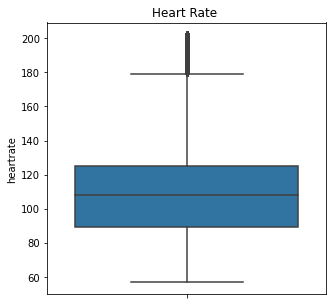

In [22]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5,5))
plt.title("Heart Rate ")
ax = sns.boxplot(y=my_dt_train["heartrate"])

The result of the boxplot reveals the various points of outliers, the outliers observed ranges from about 180 to a maximum range of 202. From the boxplot the highest quartile range can also be seen to be from 124 to 180, this simply means that most activities carried out had a heart rate of 124 bpm to 180 bpm. The third quartile range starts from the mean value which is 106, this is represented on the boxplot as where middle horizontal line is and stops at the end of the Inter-quartile range which is 124. The second quartile group, begins from the beginning of Inter-quartile range which is 86 and ends at the value 124. The first quartile group begins from the lowest point, which is 57 from the boxplot illustarted above and ends at the start of the Inter-quartile range 86.

There is a need to know the most strenous activities in relation to the increase to the heart rate. We have to plot a bar chart to visualise the mean values for the heart rate. This will help in further analyses of the activity data. 

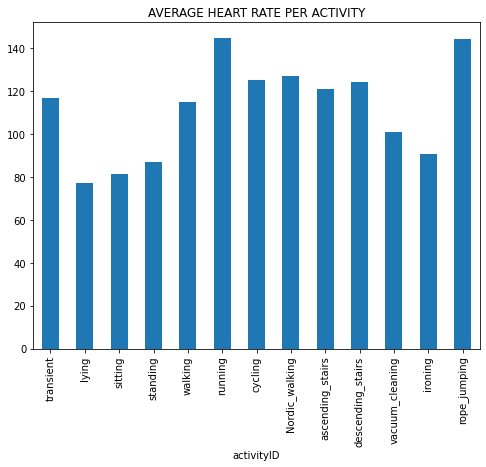

In [23]:
plt.figure(figsize=(8,6))
df_hr_act = my_dt_train['heartrate'].groupby(my_dt_train['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activity_ID)
df_hr_act.plot(kind='bar')
plt.title('AVERAGE HEART RATE PER ACTIVITY')
plt.show()

The result of the bar chart above shows that running and rope-jumping are the activities which are most cumbersome with a heartrate of about 140 bpm. Further analysis can then be done using the heatmap to check for the correlation between other columns in the data set. This will aid further analysis adn will help fashion our model to be used.

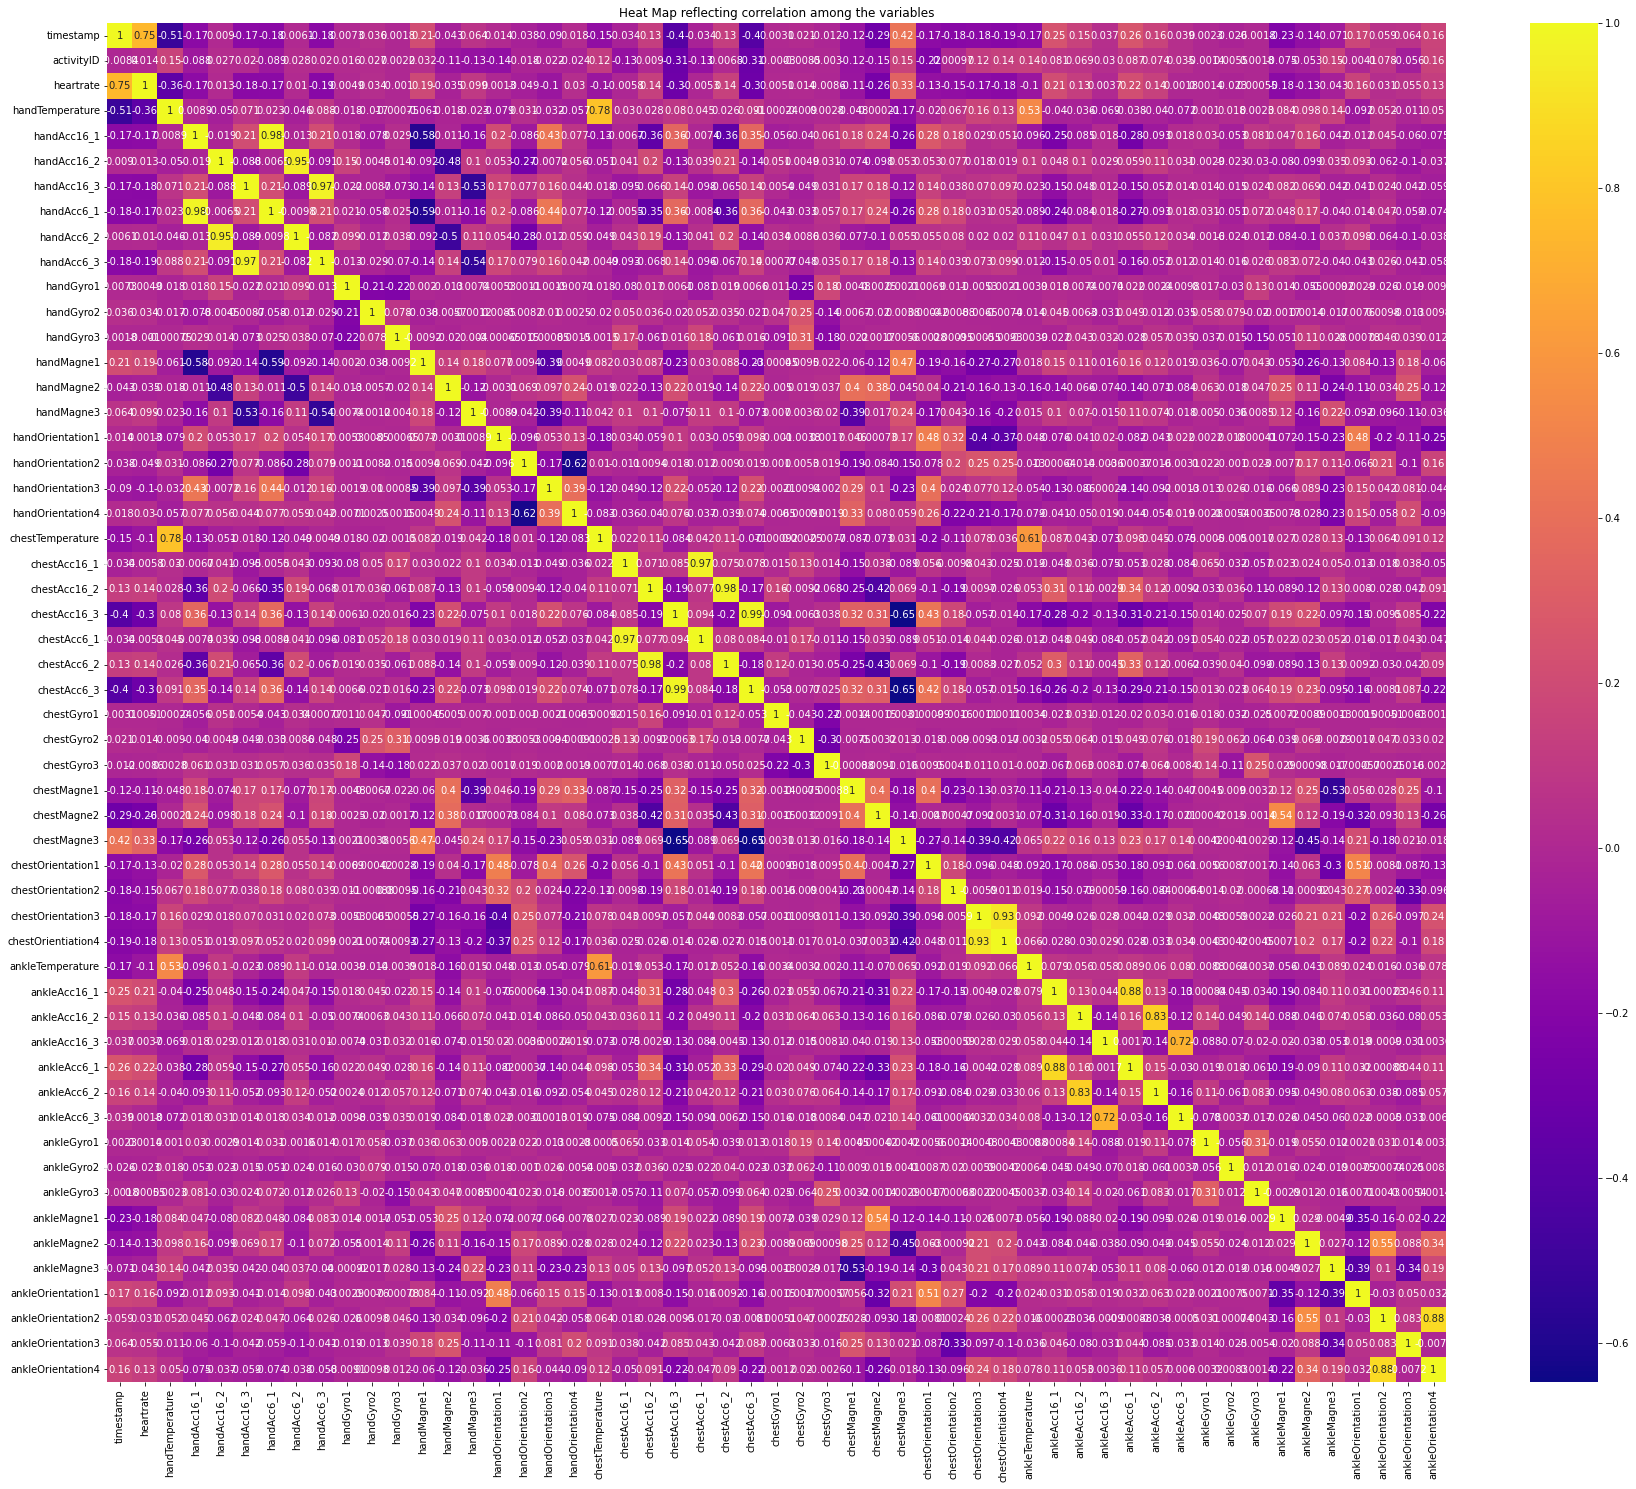

In [24]:
from pandas.plotting import scatter_matrix
my_dt_corr = my_dt_train.corr()
my_dt_corr = my_dt_corr.drop(['activityID'], axis = 1)

plt.figure(figsize = (30, 25))
sns.heatmap(my_dt_corr, cmap = 'plasma', annot = True)

plt.title('Heat Map reflecting correlation among the variables')
plt.show()



The Heatmap shows the statistical correlation between different columns. We can observe the positive and negative correlations from the columns as well as columns with little or no correlation. Time stamp and heartrate are correlated, chest temperature and hand temperature are also correlated whic makes a lot sense as this is thesame body and it is expected to be so as long as  the equipment is working properly. Correlation can also be seen between the chest acceleration 16g to chest acceleration 6g. Oyther correlations can be depicted from the heat map also.

In [25]:
my_dt_train['heartrate'].groupby(my_dt_train['Activity Description']).mean().reset_index()

,Activity Description,heartrate
0,Nordic_walking,127.078395
1,ascending_stairs,121.110273
2,cycling,125.063773
3,descending_stairs,124.220452
4,ironing,90.856305
5,lying,77.004937
6,rope_jumping,144.404099
7,running,144.780974
8,sitting,81.207421
9,standing,86.883113


# Hypothesis Testing

From the illustration of the bar chat above, the most strenous activity seem to be  running and rope jumping. However, there are some other activities which appears to be strenous like walking, cycling and nordic walking. I will base my hypothesis on walking




In [26]:
print('####Data Summary####')

Average_Heart_Rate_Walking = my_dt_train[my_dt_train['Activity Description']== 'walking']['heartrate'].mean()
Median_Heart_Rate_Walking = my_dt_train[my_dt_train['Activity Description']== 'walking']['heartrate'].median()
No_of_records = my_dt_train.shape[0]

print(Average_Heart_Rate_Walking)
print(Median_Heart_Rate_Walking)
print(No_of_records)

####Data Summary####
115.10895064415041
116.0
2275894


Ho = Average Heart Rate = 115
h1: Average Heart Rate for Walking is not 115

In [27]:
Average_Heart_Rate_Walking_Activity = my_dt_train[my_dt_train['Activity Description']== 'walking']['heartrate']


In [28]:
Average_Heart_Rate_Walking_Activity

224153    123.0
299622    122.0
237484    116.0
235962    107.0
225581    104.0
          ...  
225244    117.0
233917     94.0
239980     87.0
228041    101.0
250623    108.0
Name: heartrate, Length: 183808, dtype: float64

In [29]:
selected_walking_sample = np.random.choice(Average_Heart_Rate_Walking_Activity, size=100)
np.shape(selected_walking_sample)

(100,)

In [30]:
n = len(selected_walking_sample)
n

100

In [31]:
mean_of_selected_walking_sample = selected_walking_sample.mean()
mean_of_selected_walking_sample 


116.25

In [32]:
std_of_selected_walking_sample = selected_walking_sample.std()

print(std_of_selected_walking_sample)

13.029485791849194


In [33]:
from math import sqrt
Z = (mean_of_selected_walking_sample  -  Average_Heart_Rate_Walking )/ (std_of_selected_walking_sample/sqrt(n))  #Average population mean is 
Z

0.8757439657084477

In [34]:
PVALUE =  1- stats.norm.cdf(Z)

In [35]:
PVALUE

0.19058461914530433

In [36]:
def decision_rule():
    if PVALUE < 0.05:
        print('Reject the Null Hypothesis')
    else:
        return ('Accept the Null Hypothesis')
decision_rule()    

'Accept the Null Hypothesis'

The Pvalue is greater than 0.05, therefore we are accepting the null hypothesis that the average heart rate for running is 115 bpm.

# Modelling



# Ridge Model

The ridge regression is a type of linear regression technique that is used in machine learning to reduce the overfitting of linear models. Ridge regression is used when there are multiple variables that are are highly correlated. This model is adopted to yeys for the accuracy the analysis carried out

In [37]:
#importing the ridge library

from sklearn.linear_model import Ridge

In [38]:
my_dt.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientiation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'Activity Description'],
 

In [39]:
#defining my variables to be used 
x = my_dt[['handTemperature', 'handAcc16_3','handAcc6_3', 'handGyro2','chestTemperature', 'chestAcc16_3','chestAcc6_3', 'chestMagne3', 'ankleTemperature']]
y = my_dt['heartrate']

In [40]:
# Split the data into training and test sets
x_train_dt1, x_test_dt1, y_train_dt1, y_test_dt1 = train_test_split(x, y, test_size = 0.3, random_state = 30)


# building the ridge regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train_dt1,y_train_dt1)

Ridge(alpha=0.1)

In [41]:
y_prediction = ridge_model.predict(x_test_dt1)  #prediction

In [42]:
y_prediction 

array([ 99.95001136, 110.30499019, 109.98749453, ..., 104.76058147,
       109.82263679, 111.47478743])

In [43]:
# Compute the mean squared error
from sklearn.metrics import mean_squared_error


mse_lr = mean_squared_error(y_test_dt1, y_prediction)


In [44]:
# import the library
from sklearn.metrics import r2_score


# determining R^2 score
r2_value_ridge = r2_score(y_test_dt1, y_prediction)
print("R^2:", r2_value_ridge)

R^2: 0.2863686893974099


# Linear Regression

Linear regression is a method of modeling data that represents the relationship between a response variable and one or more predictor variable. 

In [45]:
a = my_dt[['handTemperature', 'handAcc16_3','handAcc6_3', 'handGyro2','chestTemperature', 'chestAcc16_3','chestAcc6_3', 'chestMagne3', 'ankleTemperature']]
b = my_dt['heartrate']

In [46]:
# Split the data into training and test sets
from sklearn.linear_model import LinearRegression
a_train_dt1, a_test_dt1, b_train_dt1, b_test_dt1 = train_test_split(a, b, test_size = 0.3, random_state = 30)

In [47]:

# Create a linear regression model
linear_model = LinearRegression()
linear_model.fit(a_train_dt1,b_train_dt1)

LinearRegression()

In [48]:
b_prediction = linear_model.predict(a_test_dt1)

In [49]:
b_prediction 


array([ 99.95001024, 110.30499017, 109.9874945 , ..., 104.760581  ,
       109.82263545, 111.47478764])

In [50]:
mse_lr = mean_squared_error(b_test_dt1, y_prediction)

In [51]:
# Compute the R^2 score
from sklearn.metrics import r2_score

r2_value_linear = r2_score(y_test_dt1, y_prediction)
print("R^2:", r2_value_linear)

R^2: 0.2863686893974099


# Logistic Regression

Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [52]:
# my_dt.describe()
# my_dt['Activity Group']

hrt = []


for i in my_dt['heartrate']:
    if i > 106:
        hrt.append(1)
    else:
        hrt.append(0)
        
my_dt['Activitydesc']  = hrt

my_dt.head(5)

my_dt[my_dt['Activitydesc']==1]

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description,Activitydesc
1,8.39,0,141.0,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,transient,1
5,8.43,0,121.0,30.0000,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,0.001050,-60.2954,-38.87780,-58.397700,1.000000,0.000000,0.000000,0.000000,transient,1
6,8.44,0,121.0,30.0000,2.33738,8.82900,3.54767,2.27703,8.77828,3.73230,...,0.015594,-60.6307,-38.86760,-58.271100,1.000000,0.000000,0.000000,0.000000,transient,1
7,8.45,0,121.0,30.0000,2.37142,9.05500,3.39347,2.39786,8.89814,3.64131,...,-0.000785,-60.5171,-38.98190,-58.273300,1.000000,0.000000,0.000000,0.000000,transient,1
8,8.46,0,121.0,30.0000,2.33951,9.13251,3.54668,2.44371,8.98841,3.62596,...,0.017701,-61.2916,-39.61820,-58.149900,1.000000,0.000000,0.000000,0.000000,transient,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8455,100.02,0,161.0,25.1875,-6.37083,11.64810,5.63999,-6.56804,12.48360,5.65103,...,-0.012008,-46.5426,4.87121,-0.037586,0.601586,0.030352,0.797070,-0.043034,transient,1
8462,100.09,0,114.0,25.1875,-5.34317,9.58716,5.20049,-5.49832,9.51519,4.99200,...,-0.057659,-45.7719,4.70445,0.107151,0.601000,0.034345,0.797592,-0.038292,transient,1
8466,100.13,0,161.0,25.1875,-4.98611,8.70795,4.78544,-5.18338,9.13554,5.18882,...,-0.122716,-45.6598,5.21258,-0.318540,0.599363,0.036095,0.798798,-0.037196,transient,1
8473,100.20,0,114.0,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,transient,1


In [53]:
########Logistic Reg######


X = my_dt[['heartrate', 'chestTemperature', 'handTemperature', 'ankleAcc6_1','ankleAcc16_1']]
Y =my_dt['Activitydesc']

In [54]:
my_dt.columns

Index(['timestamp', 'activityID', 'heartrate', 'handTemperature',
       'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'handOrientation1', 'handOrientation2',
       'handOrientation3', 'handOrientation4', 'chestTemperature',
       'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3', 'chestOrientation1',
       'chestOrientation2', 'chestOrientation3', 'chestOrientiation4',
       'ankleTemperature', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3',
       'ankleOrientation4', 'Activity Description', 'A

In [55]:
my_dt.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,Activity Description,Activitydesc
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,transient,0
1,8.39,0,141.0,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,transient,1
2,8.40,0,100.0,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,transient,0
3,8.41,0,100.0,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,transient,0
4,8.42,0,100.0,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,transient,0


In [56]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3)

In [59]:
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [60]:
y_pred =  lr_model.predict(xtest)

In [61]:
ytest

79008     0
320351    1
360133    1
191445    0
22757     0
         ..
96896     0
139816    0
87939     0
151817    1
133533    0
Name: Activitydesc, Length: 853461, dtype: int64

In [62]:
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [63]:
df = pd.DataFrame()

In [64]:
df['Actual'] = ytest

In [65]:
df['Predicted'] = y_pred

In [66]:
df.head(50)

,Actual,Predicted
79008,0,0
320351,1,1
360133,1,1
191445,0,0
22757,0,0
185505,1,1
152493,0,0
311867,1,1
255461,0,0
213544,1,1


In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_pred,ytest)

1.0

# Summary

The Data analysis began with a process of Importing the libraries needed, I further went on to importing my data sets which needed to be cleaned up, after the cleaning of the data set i went on with my exploratory data analysis (EDA) for further insight on the data, i was able to see the outliers and did a correlation between different columns in the data set using heat map, where I saw the relationship positive correlation and negative correlation. The focus of analysis was on the positive correlation, some of which were between, Heartrate and timestamp, Chest temperature and handtemperature. I further went on into using this relationship/correlation between the columns to gain and derive insights needed for my hypothesis testing. My Hypothesis was on the activityID, I chose to hypothesize on walking laying claim to it's comparison with the Heart rate. I was able to conclude from the hypothesis that the average heartrate is 115 bpm for acticvities done while walking. I went on with modelling where i made use of three models which were Ridge Regression, Logistic regression and Linear regression, from the Ridge regression and Linear regression model the R2 score was 28% which is low, However I would like to lay claim top the fact that this could be due to the outlier. My modelling using Linear regression was actually 100%, although this was compared with just 2 columns. However I would like to say this model was good and precise for the analysis

# REFERENCES
1. https://www.capitalone.com/tech/machine-learning/what-is-logistic-regression/
2.https://vitalflux.com/ridge-regression-concepts-python-example/#:~:text=Ridge%20regression%20is%20a%20type%20of%20linear%20regression%20technique%20that,one%20or%20more%20predictor%20variables.